# Imports needed for creating and training a neural network

## References
[Keras](https://keras.io/#getting-started-30-seconds-to-keras)  
[Numpy](https://numpy.org/devdocs/user/quickstart.html)  
[matplotlib](https://matplotlib.org/)  
[Adapted from: https://www.ics.uci.edu/~mohamadt/keras_mnist.html](https://www.ics.uci.edu/~mohamadt/keras_mnist.html)

# Importing the training images and labels and refactoring them so they fit the keras model

In [50]:
# Used to create a neural network that will be trained using the MNIST dataset
import keras as kr
# used to Store the bytes files in arrays that can be easily fed into the neural network
import numpy as np
# plotting the data on graphs for visualisation
import matplotlib.pyplot as plt

# Decompressing and assigning the datasets from MNIST

In [51]:
# Importing the the mnist dataset from built in keras feature

#This is dataset that will be used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# This is just for holding the original label values in arrays for clarifing outputs
# NOT USED IN MODEL
(train_images, train_labels), (test_images, test_labels) = kr.datasets.mnist.load_data()

# 784 is just 28 * 28 making it simpler
train_img = train_img.reshape(60000, 784)
# Setting as a float32
train_img = train_img.astype('float32')
# Normalsation, the outputs will be between 0 and 1 as opposed to 0 and 255
train_img= train_img/255
# 784 is just 28 * 28 making it simpler
test_img = test_img.reshape(10000, 784)
# Normalsation, the outputs will be between 0 and 1 as opposed to 0 and 255
test_img= test_img/255
# Setting as a float32
test_img = test_img.astype('float32')
# Manipulating the labels
# Passing the label datasets into one hot vectors to make it easier for the neural network to understand
# there are 10 digits in the mnist dataset so the vector size is 10 
# = > [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] = 5
#      0  1  2  3  4  5  6  7  8  9, 
total_Digits= 10
# convert the labels to one hot vectors 
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, total_Digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, total_Digits)

print("One hot vector at index 0 of training labels ", train_lbl[0])

One hot vector at index 0 of training labels  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Displaying the images and labels from the datasets
## Verifiying that the images and labels are structured before inputing them into the model 

Value of training label at index 0: 5
One hot Vector of training label at index 0: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


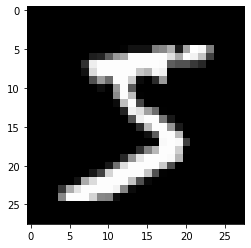

In [52]:
# displaying the training images and labels to show they are accessible
image= train_img[0]
# specialized function for showing images based on np arrays
plt.imshow(image.reshape(28,28), cmap="gray")
print("Value of training label at index 0:", train_labels[0])
print("One hot Vector of training label at index 0:", train_lbl[0])

Value of training label at index 0: 8
One hot Vector of training label at index 0: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


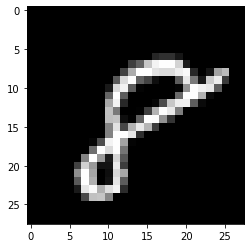

In [53]:
image= train_img[59999]
# specialized function for showing images based on np arrays
plt.imshow(image.reshape(28,28),cmap="gray")
print("Value of training label at index 0:", train_labels[59999])
print("One hot Vector of training label at index 0:", train_lbl[59999])

Value of training label at index 24: 1
Value of training label at index 24: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


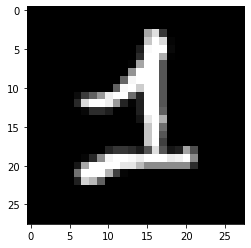

In [54]:
image= train_img[24]
# specialized function for showing images based on np arrays
plt.imshow(image.reshape(28,28),cmap="gray")
print("Value of training label at index 24:", train_labels[24])
print("Value of training label at index 24:", train_lbl[24])

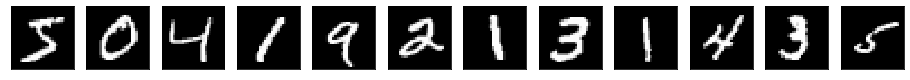

In [55]:
# Plotting the first 25 entries from the training image set
plt.figure(1, figsize=(16,5))
for i in range(12):
    plt.subplot(1,12,i+1)
    plt.imshow(train_images[i], cmap="gray")
    # removing the labels from the graph so the images are not obstructed
    plt.xticks([])
    plt.yticks([])

# Making the Neural Network
[How to start a neural network in keras](https://keras.io/#getting-started-30-seconds-to-keras)   
[ReLU Activation](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)  
[softmax](https://www.mikulskibartosz.name/understanding-the-softmax-activation-function/)


In [56]:
# Starting the the neural network using models in keras
model = kr.models.Sequential()
# 1st Layer (Input Layer)
# add an initial layer to the neural network, this layer gets inputs
# linear activation is use for the first layer to get the inputs and then move to the next layer
model.add(kr.layers.Dense(600, activation='relu', input_shape=(784,), W_regularizer=kr.regularizers.l2(0.001)))

# 2nd Layer (Simplification Layer)
# relu activation means the output of the layer will be a 1 for postive result, else it will be 0
# This layer is used for simplefying the ouputs going into the next final layer
model.add(kr.layers.Dense(400, activation="relu"))
# 3rd layer (Output Layer)
# softmax means the output will make the outputs human readable
model.add(kr.layers.Dense(10, activation="softmax"))
# Build the Neural Network
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

C:\Users\Aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(600, activation="relu", input_shape=(784,), kernel_regularizer=<keras.reg...)`
  


In [57]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_14 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                4010      
Total params: 715,410
Trainable params: 715,410
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Creating the inputs to train the neural network nusing the test_images
inputs = train_img
outputs = train_lbl
# Show that the values of the one hot vector matches the training labels value
print(train_labels[25], outputs[25])
# Just checking the type of  the inputs for clarity
type(inputs)

2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


numpy.ndarray

In [59]:
# Training the model
# the inputs are the images and the outputs are the labels of the training set
# an epoch is how many cycles through the inputs and outputs the neureal network will compare
model.fit(inputs, outputs, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.5452 - accuracy: 0.9234
Epoch 2/10
60000/60000 [==============================] - 16s 268us/step - loss: 0.2290 - accuracy: 0.9685
Epoch 3/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.1684 - accuracy: 0.9739
Epoch 4/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.1396 - accuracy: 0.9781
Epoch 5/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.1250 - accuracy: 0.9799
Epoch 6/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1157 - accuracy: 0.9819
Epoch 7/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1068 - accuracy: 0.9838
Epoch 8/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1013 - accuracy: 0.9847
Epoch 9/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0978 - accuracy: 0.9850
Epoch 10/10
60000/60000 [=============

In [60]:
# Calculate and display the loss and model accuracy 
# adpated from: https://machinelearningmastery.com/save-load-keras-deep-learning-models/
loss, accuracy = model.evaluate(test_img, test_lbl)
score = model.evaluate(test_img, test_lbl)
print(loss, accuracy)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

10000/10000 [==============================] - 1s 121us/step
0.11729121360778809 0.9800000190734863
accuracy: 98.00%


# Testing the image Manually

[[9.9991989e-01 1.2337571e-07 3.7502068e-05 8.0296623e-09 7.6388659e-07
  3.7945085e-08 1.8786217e-05 2.0887821e-05 4.1204956e-08 1.9207569e-06]]
0


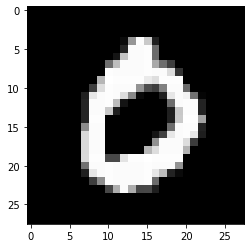

In [61]:
# Showing the image that is been tested manually for easier clarification
image= test_img[3]
plt.imshow(image.reshape(28,28),cmap="gray")
# Need to put a beginning and ending index for the image when using these methods
# Prediction only works for the datasets that have been manipulated earlier in cell
# this predict is on the one hot vertor representation of the image in the test_img ndarray
# the index 0 of the one hot vector has the highest value 9.9..., therefore the model predicts that the image is of a 0
print(model.predict(test_img[3:4]))
# this is an argmax predict it will read in the image ndarray(784) and return a single digit value
# this is more human readable then returning the result via one hot vector
print(np.argmax(model.predict(test_img[3:4])))

In [62]:
# saves the model to a h5 file (An enourmous amount of bytes) for importing into the flask server to recognise the digit drawn
model.save("model.h5")